# 1. Preliminaries

Set working directory

In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'/home/romagnolilab/Documents/GitHub/PROJECT'

Load Dependables

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap as ump

2023-03-26 10:23:53.126471: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 10:23:53.161761: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from src.data_preprocess import DataPreprocessing
from src.dimensionality import DimensionalityReduction


Load Data

In [4]:
pathX = "data/raw/RawData.xlsx"

preprocess = DataPreprocessing()
data = preprocess.load_data(pathX, target_path = None, is_dataframe = True, justFeatures = False)

In [5]:
data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


Transform Data

In [6]:
norm_data = preprocess.scale_data()
norm_data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,0.350968,0.292521,0.238525,0.468659,0.777944,0.757940,0.516965,0.493909,0.450876,0.240103,...,0.266622,0.464588,0.0,0.241389,0.277760,0.580246,0.0,0.788559,0.310381,0.0
1,0.350702,0.308210,0.297161,0.459386,0.788652,0.739205,0.521489,0.509693,0.256541,0.238025,...,0.266895,0.470400,0.0,0.240813,0.280527,0.578484,0.0,0.769701,0.246380,0.0
2,0.350251,0.459634,0.209477,0.479083,0.778920,0.784015,0.529546,0.463563,0.609511,0.247526,...,0.267055,0.473396,0.0,0.250898,0.282877,0.586596,0.0,0.772480,0.194822,0.0
3,0.352372,0.300972,0.251013,0.442794,0.727265,0.789300,0.533128,0.363171,0.393308,0.267338,...,0.267687,0.476511,0.0,0.268356,0.278263,0.568077,0.0,0.771891,0.172568,0.0
4,0.350848,0.234122,0.252805,0.514226,0.781072,0.752830,0.536877,0.428209,0.375227,0.286009,...,0.263968,0.486108,0.0,0.289550,0.276511,0.576815,0.0,0.791836,0.218329,0.0


# 2. Dimensionality Reduction

In [7]:
dreduction = DimensionalityReduction(data = norm_data, n_comp = 2)

# 2.6 UMAP

In [8]:
umap_2D_data = dreduction.fit_UMAP(state = 16)

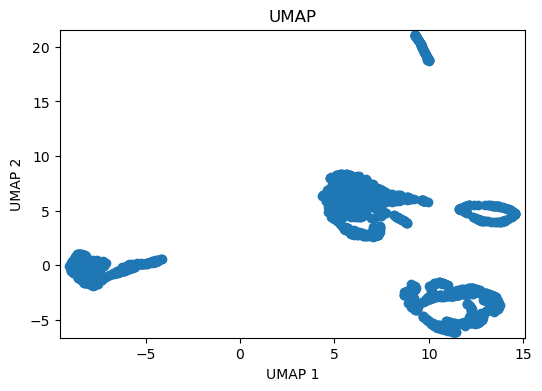

In [9]:
dreduction.plot_2D_scatter(data = umap_2D_data, type = 'UMAP')

# 3. Clustering

In [10]:
from src.clustering import ClusterAnalysis


## 3.6 UMAP data

In [11]:
UMAP = ClusterAnalysis(clusters = 5, data = umap_2D_data)

### 3.6.1 KMEans

In [12]:
# fit data and predict cluster
kmeans_UMAP_2D_data = UMAP.create_KMeans(state = 1, init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


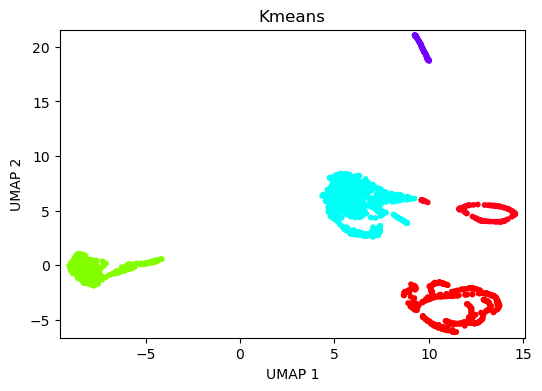

In [13]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'Kmeans'])

### 3.6.2 AgglomerativeClustering

In [14]:
# fit data and predict cluster
aggloClust_UMAP_2D_data = UMAP.create_AgglomerativeClustering()

Estimated number of clusters: 5
Estimated number of noise points: 0


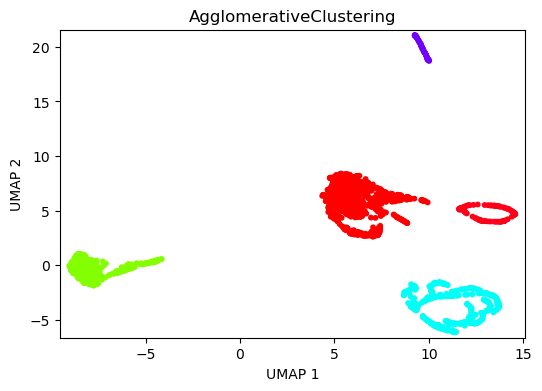

In [15]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'AgglomerativeClustering'])

### 3.6.3 DBSCAN

In [16]:
# fit data and predict cluster
dbscan_with_UMAP = UMAP.create_DBSCAN(eps_ = 0.5, min_sample_ = 5)


Estimated number of clusters: 5
Estimated number of noise points: 0


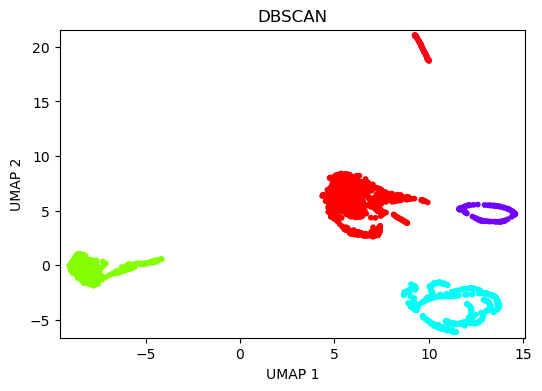

In [17]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'DBSCAN'])

### 3.5.4 HDBSCAN

In [18]:
# fit data and predict cluster
hdbscan_UMAP_2D_data = UMAP.create_HDBSCAN(min_cluster_size_ = 5, min_samples_ = 15)

Estimated number of clusters: 5
Estimated number of noise points: 0


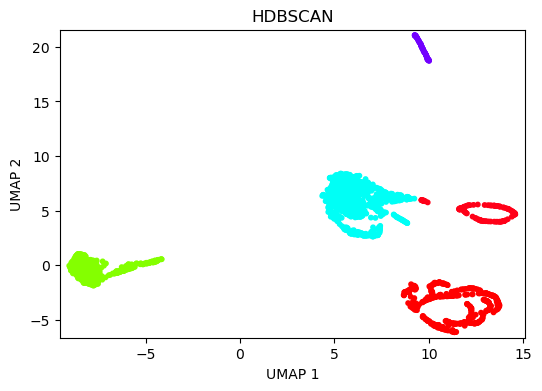

In [19]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'HDBSCAN'])

# Comparison

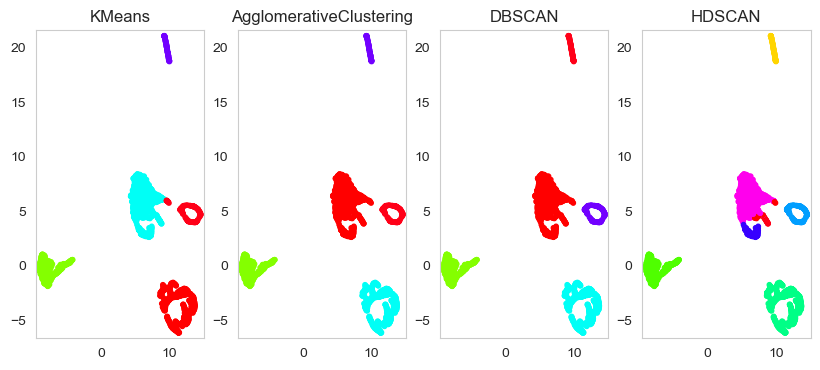

<Figure size 640x480 with 0 Axes>

In [20]:
UMAP.compare_cluster(fig_size = (10, 4), type = 'UMAP')

# UMAP

In [21]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

In [22]:
input = umap_2D_data
cluster_list = ['KMeans', 'Agglom', 'DBSCAN', 'HDBSCAN']
data_list = [kmeans_UMAP_2D_data, aggloClust_UMAP_2D_data, dbscan_with_UMAP, hdbscan_UMAP_2D_data]

for title, data_ in zip(cluster_list, data_list):
    print(f"Type: {title}, score: {davies_bouldin_score(X = input, labels = data_)}")

Type: KMeans, score: 0.32389420612093095
Type: Agglom, score: 0.2977308308300886
Type: DBSCAN, score: 0.2977308308300886
Type: HDBSCAN, score: 0.7300577820329606


# 4. Classification 

## 4.1 ANN

In [61]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [62]:
X = umap_2D_data
y = kmeans_UMAP_2D_data
# y = pd.get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
n_hidden = 10
learning_rate = 0.01
n_epochs = 1000

In [64]:
model = MLPClassifier(hidden_layer_sizes=(n_hidden,), max_iter=n_epochs, learning_rate_init=learning_rate, random_state=42)


In [65]:
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=1000,
              random_state=42)

In [66]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       167
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        19

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



In [69]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and tested your model and obtained the predicted labels
y_true = y_test
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Create the heatmap using the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



[[ 96   0   0   0   0]
 [  0  99   0   0   0]
 [  0   0 167   0   0]
 [  0   0   0  18   0]
 [  0   0   0   0  19]]


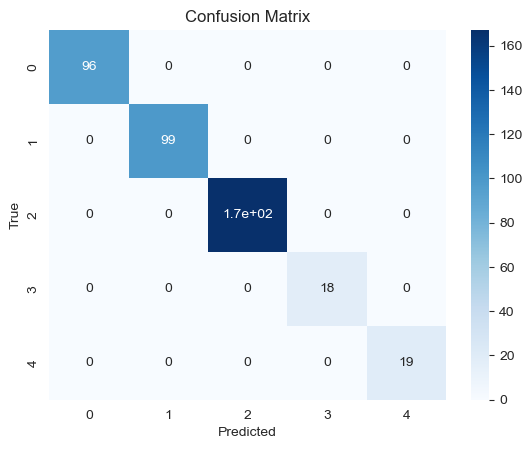

In [70]:

# Create the heatmap using the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def test_n_hidden(X_train, y_train, X_test, y_test, hidden_layers, learning_rate, n_epochs):
    """
    Tests the effect of increasing the number of hidden layers on model performance.
    Plots the accuracy scores for each number of hidden layers.
    """
    accuracy_scores = []
    
    for n_hidden in hidden_layers:
        # Define the model with the current number of hidden layers
        model = MLPClassifier(hidden_layer_sizes=(n_hidden,), max_iter=n_epochs, learning_rate_init=learning_rate, random_state=42)
        
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy score and append to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    
    # Plot the accuracy scores for each number of hidden layers as a bar plot
    x_pos = np.arange(len(hidden_layers))
    plt.bar(x_pos, accuracy_scores)
    plt.xticks(x_pos, hidden_layers)
    plt.xlabel('Number of Hidden Layers')
    plt.ylabel('Accuracy')
    plt.title('Effect of Number of Hidden Layers on Model Performance')
    plt.show()


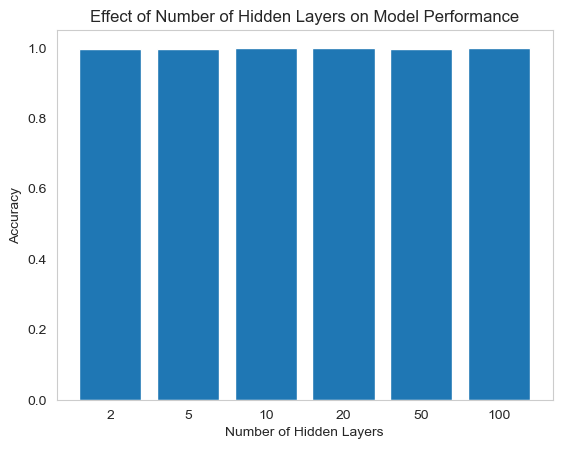

In [88]:
hidden_layers = [2, 5, 10, 20, 50, 100]
learning_rate = 0.01
n_epochs = 1000

test_n_hidden(X_train, y_train, X_test, y_test, hidden_layers, learning_rate, n_epochs)


In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def test_learning_rate(X_train, y_train, X_test, y_test, hidden_layers, learning_rate, n_epochs):
    """
    Tests the effect of increasing the number of hidden layers on model performance.
    Plots the accuracy scores for each number of hidden layers.
    """
    accuracy_scores = []
    
    for rate in learning_rate:
        # Define the model with the current number of hidden layers
        model = MLPClassifier(hidden_layer_sizes=(hidden_layers,), max_iter=n_epochs, learning_rate_init=rate, random_state=42)
        
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy score and append to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    
    # Plot the accuracy scores for each number of learning_rate as a bar plot
    x_pos = np.arange(len(learning_rate))
    plt.bar(x_pos, accuracy_scores)
    plt.xticks(x_pos, learning_rate)
    plt.xlabel('Learning rate')
    plt.ylabel('Accuracy')
    plt.title('Effect of learning rate on Model Performance')
    plt.show()


/home/romagnolilab/anaconda3/envs/ECM/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


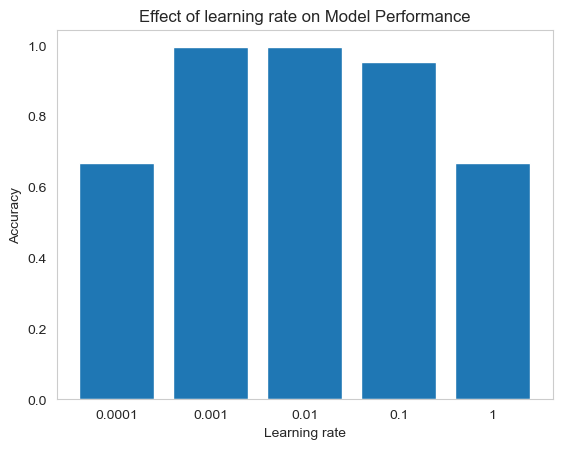

In [90]:
hidden_layers = 2
learning_rate = [1e-4, 1e-3, 1e-2, 0.1, 1]
n_epochs = 1000

test_learning_rate(X_train, y_train, X_test, y_test, hidden_layers, learning_rate, n_epochs)


In [93]:
def test_solver_algorithm(X_train, y_train, X_test, y_test, hidden_layers, learning_rate, n_epochs, algorithm, state = 42):
        """
        Tests the effect of increasing the number of hidden layers on model performance.
        Plots the accuracy scores for each number of hidden layers.
        """
        accuracy_scores = []
        
        for method in algorithm:
            # Define the model with the current number of hidden layers
            model = MLPClassifier(hidden_layer_sizes=(hidden_layers,), max_iter=n_epochs, solver = method, learning_rate_init=learning_rate, random_state=state)
            
            # Train the model on the training data
            model.fit(X_train, y_train)
            
            # Make predictions on the test data
            y_pred = model.predict(X_test)
            
            # Calculate the accuracy score and append to the list
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_scores.append(accuracy)
        
        # Plot the accuracy scores for each number of learning_rate as a bar plot
        x_pos = np.arange(len(algorithm))
        plt.bar(x_pos, accuracy_scores)
        plt.xticks(x_pos, algorithm)
        plt.xlabel('Solver')
        plt.ylabel('Accuracy')
        plt.title('Effect of Solver on Model Performance')
        plt.show()  

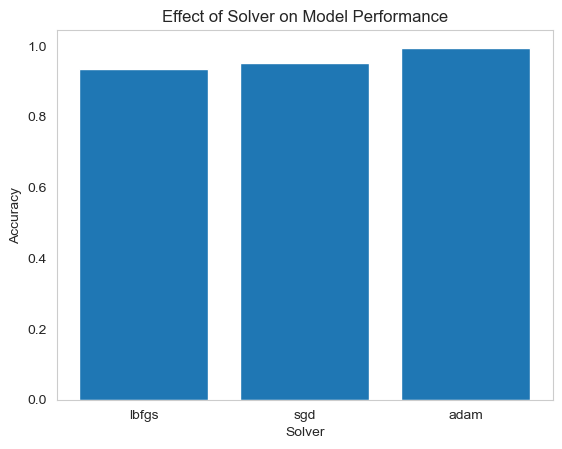

In [94]:
hidden_layers = 2
learning_rate = 0.01
n_epochs = 1000
algorithm = ['lbfgs', 'sgd', 'adam']
test_solver_algorithm(X_train, y_train, X_test, y_test, hidden_layers, learning_rate, n_epochs, algorithm, state = 42)

## 4.2 SVM

In [95]:
from sklearn.svm import SVC

In [96]:
model_svm = SVC()
model_svm.fit(X_train, y_train)


SVC()

In [97]:
y_pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        99
           2       0.99      1.00      0.99       167
           3       1.00      1.00      1.00        18
           4       1.00      0.89      0.94        19

    accuracy                           0.99       399
   macro avg       1.00      0.98      0.99       399
weighted avg       1.00      0.99      0.99       399



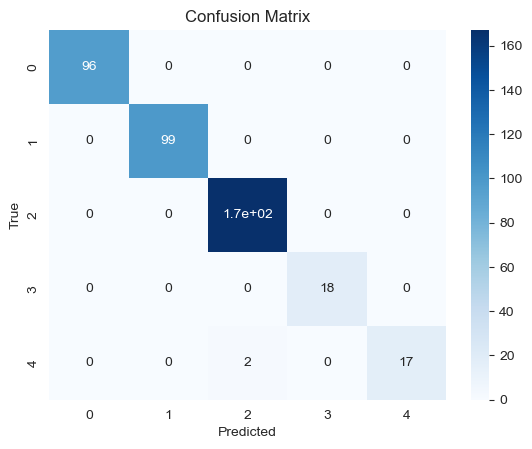

In [98]:
# Create the confusion matrix
cm = confusion_matrix(y_test, model_svm.predict(X_test))


# Create the heatmap using the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

